<a href="https://colab.research.google.com/github/emanuel379/Otimizacao-Nao-Linear/blob/main/Trabalho_final_de_Otimiza%C3%A7%C3%A3o_N%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instituto de Ciências Matemática e de Computação (ICMC-USP)
# Disciplina: SME0212 - Otimização Não Linear     
$ \ $
##  $ \quad\quad\quad $  **Projeto Prático: Problema de Quadrados Mínimos sem Restrições Aplicado a Reconstrução de Imagens**  
$ \ $
$ \ $
###   Prof Dr. Elias Salomão Helou Neto         
$ \ $

#####  Alunos:
#####  Anderson B. da S. Lavinscky $ \quad\quad n°USP: 9045195$
#####  Emanuel Victor da Silva Favorato $ \quad\quad n°USP: 12558151$
#####  João Marcelo Rodrigues Júnior $ \quad\quad n°USP: 8531118$

\\
$\quad\quad\quad\quad\quad\quad 2024 $


# Objetivo do trabalho

1. Utilizar e/ou criar algoritmos voltados ao problema de quadrados mínimos sem restrições;
2. Aplicar os algoritmos em reconstrução de imagens;
3. Comparar e mostrar os resultados encontrados por 3 ou mais algoritmos;


# Pacotes necessários

In [ ]:
# Packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import io, color
import scipy.optimize as opt
import time
from scipy.sparse import diags, identity
from scipy.sparse.linalg import cg as sparse_cg

# Carregando a imagem

In [ ]:
# Visualizacao de imagens (original, borrada e reconstruida)
def print_img(img1, img2, img3, msg1, msg2, msg3):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.title(msg1)
    plt.imshow(img1, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title(msg2)
    plt.imshow(img2, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(msg3)
    plt.imshow(img3, cmap='gray')
    plt.axis('off')

    plt.show()

In [ ]:
# Carregar a imagem original
image_path = 'elias.png'
image = io.imread(image_path)
if image.ndim == 3:
    image = color.rgb2gray(image)  # Converter para escala de cinza

# Normalizar a imagem para o intervalo [0, 1]
image = image / 255.0

# 1. Método de Máxima Descida com busca direcional exata

In [ ]:
# Função objetivo (diferença entre imagens)
def loss_func(x, blurred_image, sigma, n_rows, n_cols):
    x_image = x.reshape((n_rows, n_cols))
    blurred_simulated = gaussian_filter(x_image, sigma=sigma)
    diff = blurred_simulated - blurred_image
    return np.sum(diff**2)

# Gradiente aproximado usando diferenças finitas
def grad_func(x, blurred_image, sigma, n_rows, n_cols):
    x_image = x.reshape((n_rows, n_cols))
    blurred_simulated = gaussian_filter(x_image, sigma=sigma)
    diff = blurred_simulated - blurred_image

    # Gradiente aproximado com convolução reversa
    grad = gaussian_filter(diff, sigma=sigma)
    return grad.flatten()

# Otimização com busca exata
def gradient_descent_exact(image, sigma, tol=1e-12, max_iter=100):
    # Inicializar
    n_rows, n_cols = image.shape

    # Aplicacao do filtro Gaussiano (imagem borrada)
    blurred_img = gaussian_filter(image, sigma=sigma)
    x0 = blurred_img.flatten()

    x = np.array(x0, dtype=float)
    for _ in range(max_iter):
        grad = grad_func(x, blurred_img, sigma, n_rows, n_cols)
        if np.linalg.norm(grad) < tol:
            break

        # Definir função direcional para busca linear
        def line_search_func(step):
            return loss_func(x - step * grad, blurred_img, sigma, n_rows, n_cols)

        # Encontrar tamanho de passo ótimo
        step = opt.minimize_scalar(line_search_func).x

        # Atualizar x
        x = x - step * grad

    # Remodelando a imagem
    recovered_img = x.reshape((n_rows, n_cols))

    return blurred_img, recovered_img

In [ ]:
# Parâmetro do borrão
sigma = 3

# Resolver o problema de otimização
start_1 = time.time()
blurred_image, reconstructed_image_md = gradient_descent_exact(image, sigma)
end_1 = time.time()

Método de Máxima Descida



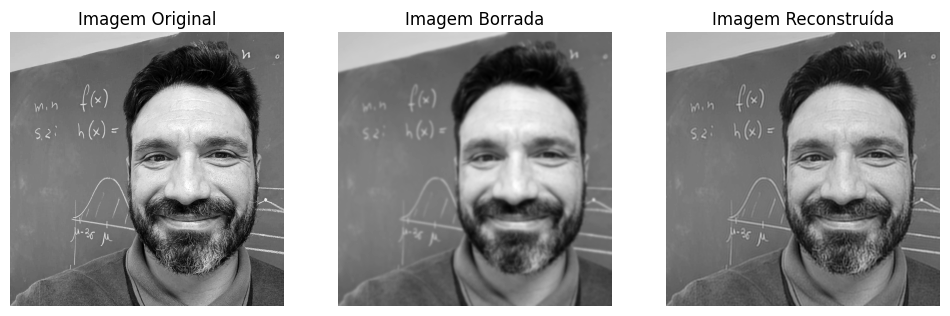


Parâmetro do borrão (sigma): 3 - Tempo de execução: 52.22 segundos


In [ ]:
# Exibir resultados
print("Método de Máxima Descida\n")
print_img(image, blurred_image, reconstructed_image_md, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma): {sigma} - Tempo de execução: {(end_1 - start_1):.2f} segundos")

In [ ]:
# Parâmetro do borrão
sigma = 5

# Resolver o problema de otimização
start_1 = time.time()
blurred_image, reconstructed_image_md = gradient_descent_exact(image, sigma)
end_1 = time.time()

Método de Máxima Descida



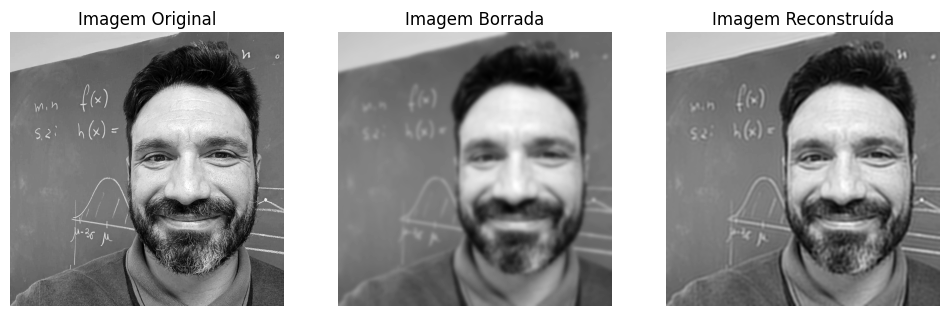


Parâmetro do borrão (sigma): 5 - Tempo de execução: 69.16 segundos


In [ ]:
# Exibir resultados
print("Método de Máxima Descida\n")
print_img(image, blurred_image, reconstructed_image_md, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma): {sigma} - Tempo de execução: {(end_1 - start_1):.2f} segundos")

In [ ]:
# Parâmetro do borrão
sigma = 7

# Resolver o problema de otimização
start_1 = time.time()
blurred_image, reconstructed_image_md = gradient_descent_exact(image, sigma)
end_1 = time.time()

Método de Máxima Descida



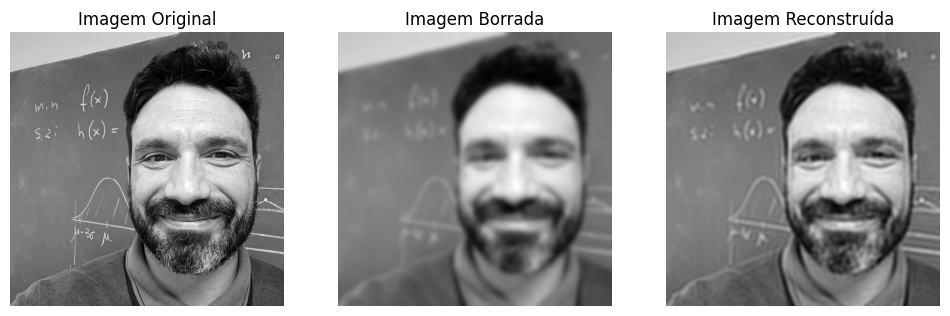


Parâmetro do borrão (sigma): 7 - Tempo de execução: 97.48 segundos


In [ ]:
# Exibir resultados
print("Método de Máxima Descida\n")
print_img(image, blurred_image, reconstructed_image_md, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma): {sigma} - Tempo de execução: {(end_1 - start_1):.2f} segundos")

# 2. Método de Nesterov com tamanho de passo fixo

In [ ]:
# Define the loss function
def loss_func(x, blurred_image, sigma, n_rows, n_cols):
    x_image = x.reshape((n_rows, n_cols))
    blurred_simulated = gaussian_filter(x_image, sigma=sigma)
    diff = blurred_simulated - blurred_image
    return np.sum(diff**2)

# Define the gradient of the loss function
def grad_func(x, blurred_image, sigma, n_rows, n_cols):
    x_image = x.reshape((n_rows, n_cols))
    blurred_simulated = gaussian_filter(x_image, sigma=sigma)
    diff = blurred_simulated - blurred_image

    # Compute the gradient by applying the transpose of the Gaussian filter
    grad = gaussian_filter(diff, sigma=sigma)
    return grad.flatten()

# Nesterov method with fixed step size
def nesterov_fixed_step(image, sigma, step_size=0.005, tol=1e-12, max_iter=100):
    # Inicializar
    n_rows, n_cols = image.shape

    # Aplicacao do filtro Gaussiano (imagem borrada)
    blurred_img = gaussian_filter(image, sigma=sigma)
    x0 = blurred_img.flatten()

    x = np.array(x0, dtype=float)
    y = x.copy()  # Initialize y
    velocity = np.zeros_like(x)  # Initialize velocity
    momentum = 0.9  # Momentum parameter

    for i in range(max_iter):
        # Compute the gradient at the intermediate point y
        grad = grad_func(y, blurred_img, sigma, n_rows, n_cols)

        # Update the velocity
        velocity = momentum * velocity - step_size * grad

        # Update x and y
        x_new = y + velocity
        y = x_new + momentum * (x_new - x)

        # Check for convergence
        if np.linalg.norm(grad) < tol:
            print(f"Converged in {i + 1} iterations.")
            break

        x = x_new

    # Reshape the image
    recovered_img = x.reshape((n_rows, n_cols))

    return blurred_img, recovered_img

In [ ]:
# Blur parameter
sigma = 3

# Solve the optimization problem
start_2 = time.time()
blurred_image, reconstructed_image_nest = nesterov_fixed_step(image, sigma)
end_2 = time.time()

Método de Nesterov



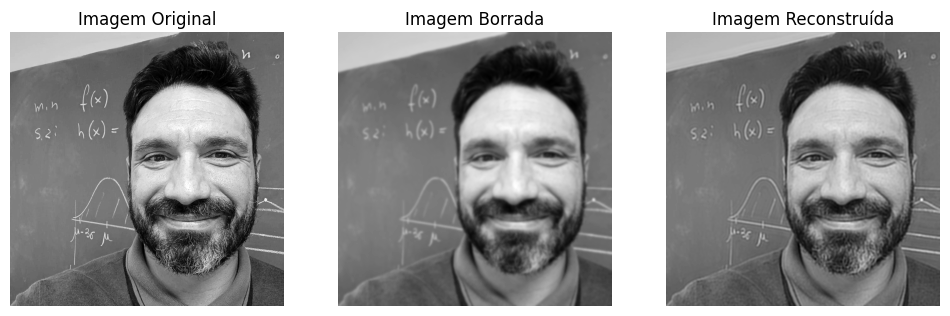


Parâmetro do borrão (sigma) = 3 - Tempo de execução: 10.24 segundos


In [ ]:
# Display results
print("Método de Nesterov\n")
print_img(image, blurred_image, reconstructed_image_nest, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma) = {sigma} - Tempo de execução: {(end_2 - start_2):.2f} segundos")

In [ ]:
# Blur parameter
sigma = 5

# Solve the optimization problem
start_2 = time.time()
blurred_image, reconstructed_image_nest = nesterov_fixed_step(image, sigma)
end_2 = time.time()

Método de Nesterov



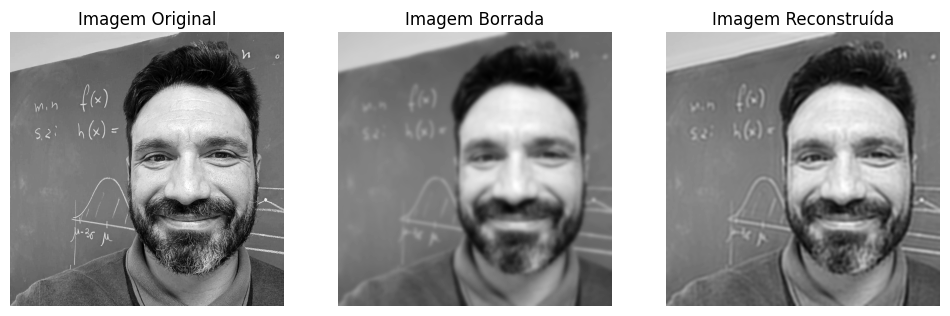


Parâmetro do borrão (sigma) = 5 - Tempo de execução: 13.59 segundos


In [ ]:
# Display results
print("Método de Nesterov\n")
print_img(image, blurred_image, reconstructed_image_nest, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma) = {sigma} - Tempo de execução: {(end_2 - start_2):.2f} segundos")

In [ ]:
# Blur parameter
sigma = 7

# Solve the optimization problem
start_2 = time.time()
blurred_image, reconstructed_image_nest = nesterov_fixed_step(image, sigma)
end_2 = time.time()

Método de Nesterov



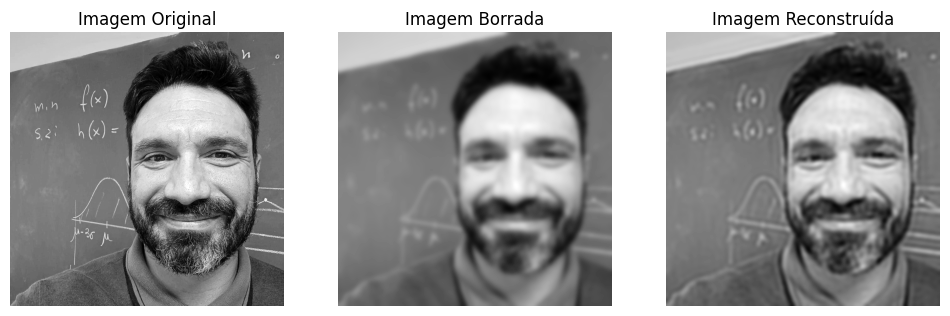


Parâmetro do borrão (sigma) = 7 - Tempo de execução: 16.39 segundos


In [ ]:
# Display results
print("Método de Nesterov\n")
print_img(image, blurred_image, reconstructed_image_nest, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma) = {sigma} - Tempo de execução: {(end_2 - start_2):.2f} segundos")

# 3. Método de gradientes conjugados


In [ ]:
# Initialize variables
def aux_cg(image, sigma):
    # Image dimensions
    n_rows, n_cols = image.shape

    # Gaussian filter application (blurred image)
    blurred_img = gaussian_filter(image, sigma=sigma)
    b = blurred_img.flatten() # Observed data (flattened blurred image)

    # Define a Laplacian-like smoothing operator (Q) optimized for sparsity
    n = n_rows * n_cols
    diagonals = [-np.ones(n), 4 * np.ones(n), -np.ones(n)]  # Simplified sparse Laplacian
    offsets = [-1, 0, 1]
    D = diags(diagonals, offsets, shape=(n, n), format='csr')
    Q = identity(n, format='csr') - 0.0005 * (D.T @ D)  # Reduced regularization weight

    return Q, b, blurred_img

# Solve the linear system Qx = b using Conjugate Gradient
def conjugate_grad(Q, b, image, iter=100, tol=1e-12):
    # Image dimensions
    n_rows, n_cols = image.shape

    x_cg, info = sparse_cg(Q, b, maxiter=iter, rtol=tol)  # Higher precision

    # Reshape the solution to image dimensions
    reconstructed_img = x_cg.reshape(n_rows, n_cols)

    return reconstructed_img, info


In [ ]:
# Blur parameter
sigma = 3

# Conjugated gradient parameters
Q, b, blurred_image = aux_cg(image, sigma)

# Solve the optimization problem
start_3 = time.time()
reconstructed_image_cg, info = conjugate_grad(Q, b, image)  # Higher precision
end_3 = time.time()

Método de Gradiente Conjugado



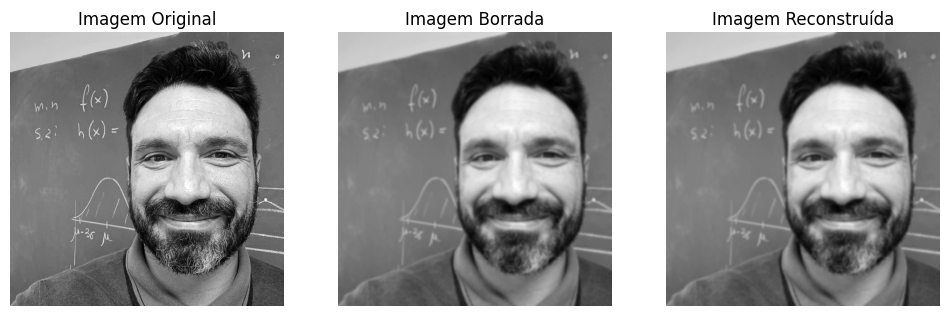


Parâmetro do borrão (sigma) = 3 - Tempo de execução: 0.08 segundos


In [ ]:
# Visualize the original, blurred, and reconstructed images
print("Método de Gradiente Conjugado\n")
print_img(image, blurred_image, reconstructed_image_cg, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma) = {sigma} - Tempo de execução: {(end_3 - start_3):.2f} segundos")

In [ ]:
# Blur parameter
sigma = 5

# Conjugated gradient parameters
Q, b, blurred_image = aux_cg(image, sigma)

# Solve the optimization problem
start_3 = time.time()
reconstructed_image_cg, info = conjugate_grad(Q, b, image)  # Higher precision
end_3 = time.time()

Método de Gradiente Conjugado



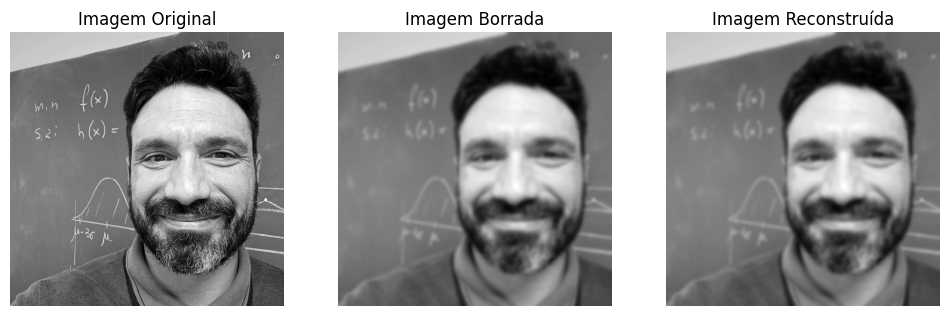


Parâmetro do borrão (sigma) = 5 - Tempo de execução: 0.07 segundos


In [ ]:
# Visualize the original, blurred, and reconstructed images
print("Método de Gradiente Conjugado\n")
print_img(image, blurred_image, reconstructed_image_cg, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma) = {sigma} - Tempo de execução: {(end_3 - start_3):.2f} segundos")

In [ ]:
# Blur parameter
sigma = 7

# Conjugated gradient parameters
Q, b, blurred_image = aux_cg(image, sigma)

# Solve the optimization problem
start_3 = time.time()
reconstructed_image_cg, info = conjugate_grad(Q, b, image)  # Higher precision
end_3 = time.time()

Método de Gradiente Conjugado



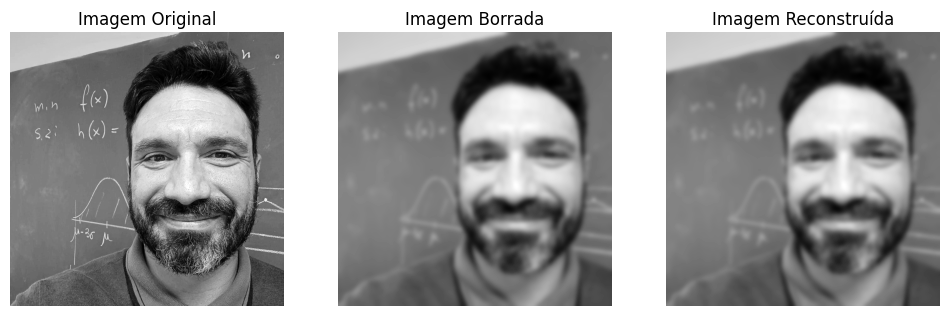


Parâmetro do borrão (sigma) = 7 - Tempo de execução: 0.07 segundos


In [ ]:
# Visualize the original, blurred, and reconstructed images
print("Método de Gradiente Conjugado\n")
print_img(image, blurred_image, reconstructed_image_cg, "Imagem Original", "Imagem Borrada", "Imagem Reconstruída")
print(f"\nParâmetro do borrão (sigma) = {sigma} - Tempo de execução: {(end_3 - start_3):.2f} segundos")

# 4. Comparando os métodos

Comparação das imagens reconstruídas pelos métodos (sigma = 3)



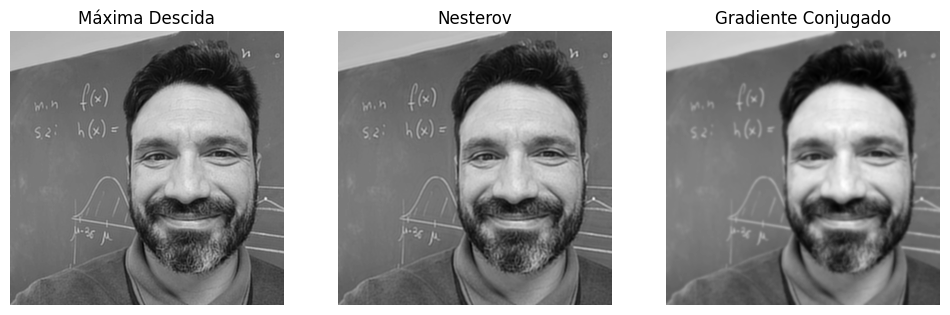

In [ ]:
# Visualize the reconstructed images from the three algorithms (sigma = 3)
print(f"Comparação das imagens reconstruídas pelos métodos (sigma = {sigma})\n")
print_img(reconstructed_image_md, reconstructed_image_nest, reconstructed_image_cg, "Máxima Descida", "Nesterov", "Gradiente Conjugado")

Comparação das imagens reconstruídas pelos métodos (sigma = 5)



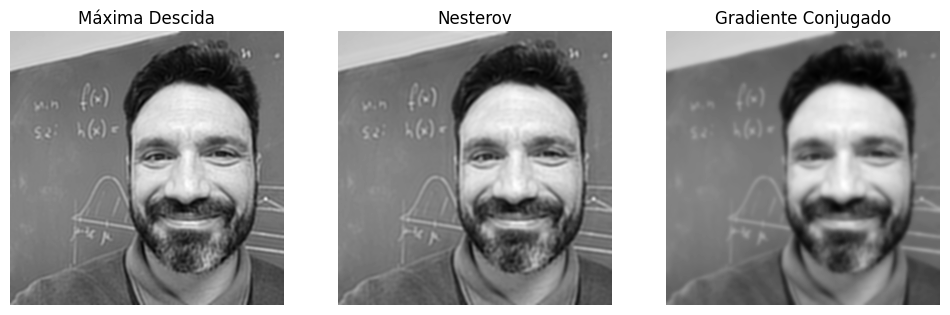

In [ ]:
# Visualize the reconstructed images from the three algorithms (sigma = 5)
print(f"Comparação das imagens reconstruídas pelos métodos (sigma = {sigma})\n")
print_img(reconstructed_image_md, reconstructed_image_nest, reconstructed_image_cg, "Máxima Descida", "Nesterov", "Gradiente Conjugado")

Comparação das imagens reconstruídas pelos métodos (sigma = 7)



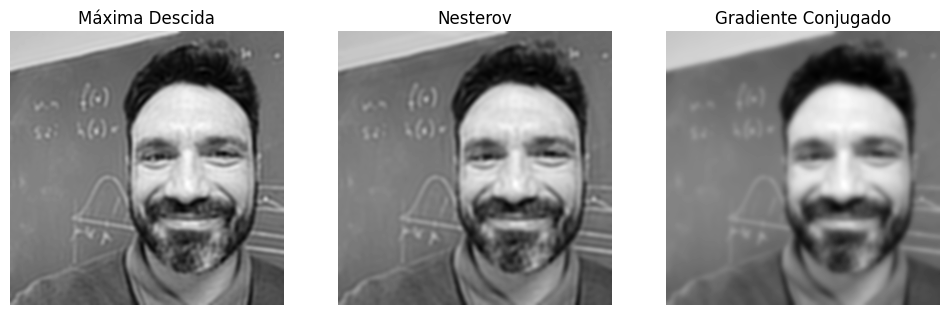

In [ ]:
# Visualize the reconstructed images from the three algorithms (sigma = 7)
print(f"Comparação das imagens reconstruídas pelos métodos (sigma = {sigma})\n")
print_img(reconstructed_image_md, reconstructed_image_nest, reconstructed_image_cg, "Máxima Descida", "Nesterov", "Gradiente Conjugado")

In [ ]:
# Modified Gradient Descent Exact Method
def gradient_descent_exact(x0, blurred_image, sigma, n_rows, n_cols, tol=1e-12, max_iter=100):
    x = np.array(x0, dtype=float)
    iterations = 0
    start_time = time.time()

    for _ in range(max_iter):
        grad = grad_func(x, blurred_image, sigma, n_rows, n_cols)
        if np.linalg.norm(grad) < tol:
            break

        # Line search to find optimal step size
        def line_search_func(step):
            return loss_func(x - step * grad, blurred_image, sigma, n_rows, n_cols)

        step = opt.minimize_scalar(line_search_func).x
        x = x - step * grad
        iterations += 1

    end_time = time.time()
    return x, iterations, end_time - start_time

# Modified Nesterov Method
def nesterov_fixed_step(x0, blurred_image, sigma, n_rows, n_cols, step_size=0.005, tol=1e-12, max_iter=100):
    x = np.array(x0, dtype=float)
    y = x.copy()
    velocity = np.zeros_like(x)
    momentum = 0.9
    iterations = 0
    start_time = time.time()

    for i in range(max_iter):
        grad = grad_func(y, blurred_image, sigma, n_rows, n_cols)
        velocity = momentum * velocity - step_size * grad
        x_new = y + velocity
        y = x_new + momentum * (x_new - x)

        if np.linalg.norm(grad) < tol:
            break

        iterations += 1
        x = x_new

    end_time = time.time()
    return x, iterations, end_time - start_time

# Modified Conjugate Gradient Method
def conjugate_gradient(x0, blurred_image, sigma, n_rows, n_cols, tol=1e-12, max_iter=100):
    n = n_rows * n_cols
    b = blurred_image.flatten()
    diagonals = [-np.ones(n), 4 * np.ones(n), -np.ones(n)]
    offsets = [-1, 0, 1]
    D = diags(diagonals, offsets, shape=(n, n), format='csr')
    Q = identity(n, format='csr') - 0.0005 * (D.T @ D)

    start_time = time.time()
    x_cg, info = sparse_cg(Q, b, maxiter=max_iter, rtol=tol)
    end_time = time.time()

    iterations = max_iter if info == 0 else 0
    return x_cg, iterations, end_time - start_time

# Function to Compare All Methods
def compare_methods(x0, blurred_image, sigma, n_rows, n_cols):
    methods = {
        "Máxima Descida": gradient_descent_exact,
        "Nesterov": nesterov_fixed_step,
        "Gradiente Conjugado": conjugate_gradient
    }

    results = {}
    for name, method in methods.items():
        reconstructed, iterations, exec_time = method(x0, blurred_image, sigma, n_rows, n_cols)
        results[name] = (iterations, exec_time)

    # Print the results
    for name, (iterations, exec_time) in results.items():
        print(f"{name}: {iterations} iterations, {exec_time:.4f} seconds")

    return results

In [ ]:
#Blur parameter
sigma = 3

# Image dimensions
n_rows, n_cols = image.shape

# Aplicacao do filtro Gaussiano (imagem borrada)
blurred_image = gaussian_filter(image, sigma=sigma)
x0 = blurred_image.flatten()

# Run comparison
results = compare_methods(x0, blurred_image, sigma, n_rows, n_cols)

# Plotting the comparison
method_names = list(results.keys())
iterations = [results[name][0] for name in method_names]
execution_times = [results[name][1] for name in method_names]

Máxima Descida: 100 iterations, 50.4641 seconds
Nesterov: 100 iterations, 9.4640 seconds
Gradiente Conjugado: 100 iterations, 0.0929 seconds


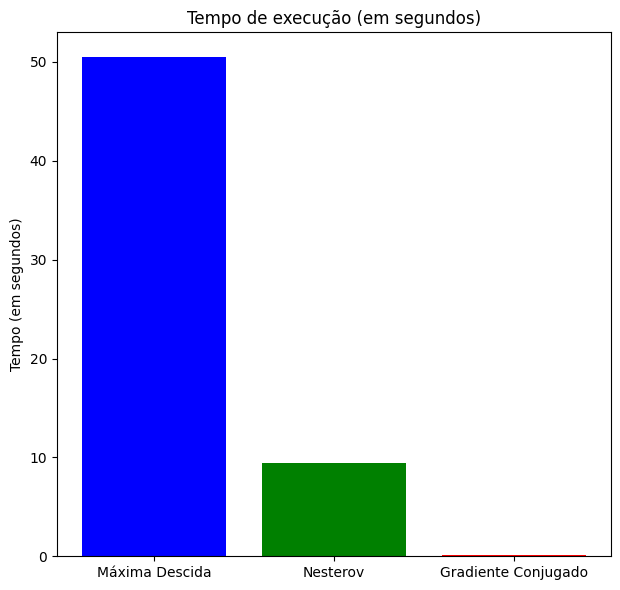

In [ ]:
# Plot number of iterations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# plt.bar(method_names, iterations, color=["blue", "green", "red"])
# plt.title('Número de iterações')
# plt.ylabel('Iterações')

# Plot execution time
# plt.subplot(1, 2, 2)
plt.bar(method_names, execution_times, color=["blue", "green", "red"])
plt.title('Tempo de execução (em segundos)')
plt.ylabel('Tempo (em segundos)')

plt.tight_layout()
plt.show()

In [ ]:
#Blur parameter
sigma = 5

# Image dimensions
n_rows, n_cols = image.shape

# Aplicacao do filtro Gaussiano (imagem borrada)
blurred_image = gaussian_filter(image, sigma=sigma)
x0 = blurred_image.flatten()

# Run comparison
results = compare_methods(x0, blurred_image, sigma, n_rows, n_cols)

# Plotting the comparison
method_names = list(results.keys())
iterations = [results[name][0] for name in method_names]
execution_times = [results[name][1] for name in method_names]

Máxima Descida: 100 iterations, 68.0904 seconds
Nesterov: 100 iterations, 13.5253 seconds
Gradiente Conjugado: 100 iterations, 0.0723 seconds


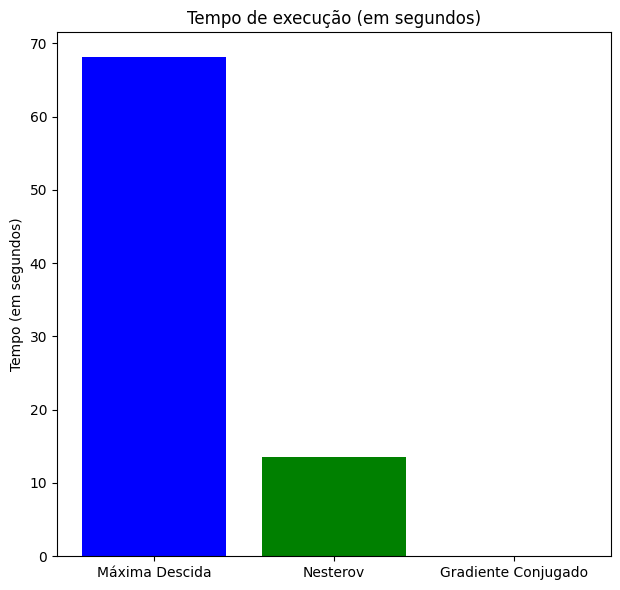

In [ ]:
# Plot number of iterations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# plt.bar(method_names, iterations, color=["blue", "green", "red"])
# plt.title('Número de iterações')
# plt.ylabel('Iterações')

# Plot execution time
# plt.subplot(1, 2, 2)
plt.bar(method_names, execution_times, color=["blue", "green", "red"])
plt.title('Tempo de execução (em segundos)')
plt.ylabel('Tempo (em segundos)')

plt.tight_layout()
plt.show()

In [ ]:
#Blur parameter
sigma = 7

# Image dimensions
n_rows, n_cols = image.shape

# Aplicacao do filtro Gaussiano (imagem borrada)
blurred_image = gaussian_filter(image, sigma=sigma)
x0 = blurred_image.flatten()

# Run comparison
results = compare_methods(x0, blurred_image, sigma, n_rows, n_cols)

# Plotting the comparison
method_names = list(results.keys())
iterations = [results[name][0] for name in method_names]
execution_times = [results[name][1] for name in method_names]

Máxima Descida: 100 iterations, 95.4750 seconds
Nesterov: 100 iterations, 16.0314 seconds
Gradiente Conjugado: 100 iterations, 0.0711 seconds


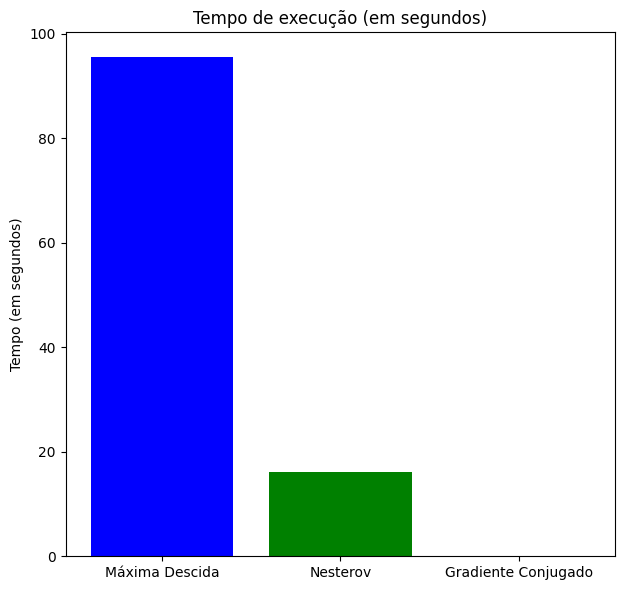

In [ ]:
# Plot number of iterations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
# plt.bar(method_names, iterations, color=["blue", "green", "red"])
# plt.title('Número de iterações')
# plt.ylabel('Iterações')

# Plot execution time
# plt.subplot(1, 2, 2)
plt.bar(method_names, execution_times, color=["blue", "green", "red"])
plt.title('Tempo de execução (em segundos)')
plt.ylabel('Tempo (em segundos)')

plt.tight_layout()
plt.show()

In [ ]:
# Modified Gradient Descent Exact Method to Track Loss
def gradient_descent_exact(x0, blurred_image, sigma, n_rows, n_cols, tol=1e-12, max_iter=100):
    x = np.array(x0, dtype=float)
    loss_values = []  # Track loss at each iteration
    iterations = 0
    start_time = time.time()

    for _ in range(max_iter):
        grad = grad_func(x, blurred_image, sigma, n_rows, n_cols)
        if np.linalg.norm(grad) < tol:
            break

        # Define line search function
        def line_search_func(step):
            return loss_func(x - step * grad, blurred_image, sigma, n_rows, n_cols)

        # Find optimal step size
        step = opt.minimize_scalar(line_search_func).x

        # Update x
        x = x - step * grad
        iterations += 1

        # Record loss after each iteration
        loss_values.append(loss_func(x, blurred_image, sigma, n_rows, n_cols))

    end_time = time.time()
    return x, iterations, end_time - start_time, loss_values

# Modified Nesterov Method to Track Loss
def nesterov_fixed_step(x0, blurred_image, sigma, n_rows, n_cols, step_size=0.005, tol=1e-12, max_iter=100):
    x = np.array(x0, dtype=float)
    y = x.copy()  # Intermediate point
    velocity = np.zeros_like(x)  # Initialize velocity
    momentum = 0.9  # Momentum parameter
    loss_values = []  # Track loss at each iteration
    iterations = 0
    start_time = time.time()

    for i in range(max_iter):
        grad = grad_func(y, blurred_image, sigma, n_rows, n_cols)  # Compute gradient at y

        # Update velocity (momentum)
        velocity = momentum * velocity - step_size * grad

        # Update x with the new velocity
        x_new = y + velocity

        # Update y (intermediate point)
        y = x_new + momentum * (x_new - x)

        # Check for convergence
        if np.linalg.norm(grad) < tol:
            print(f"Converged in {i + 1} iterations.\n")
            break

        x = x_new
        iterations += 1

        # Record loss after each iteration
        loss_values.append(loss_func(x, blurred_image, sigma, n_rows, n_cols))

    end_time = time.time()
    return x, iterations, end_time - start_time, loss_values

# Modified Conjugate Gradient Method to Track Loss
def conjugate_gradient_method(Q, b, max_iter=100, tol=1e-12):
    x = np.zeros_like(b)
    r = b - Q @ x  # Residual
    p = r.copy()  # Initial direction
    loss_values = []  # Track loss at each iteration
    iterations = 0
    start_time = time.time()

    for i in range(max_iter):
        alpha = np.dot(r, r) / np.dot(p, Q @ p)
        x = x + alpha * p
        r_new = r - alpha * Q @ p

        # Check for convergence
        if np.linalg.norm(r_new) < tol:
            print(f"Converged in {i + 1} iterations.\n")
            break

        beta = np.dot(r_new, r_new) / np.dot(r, r)
        p = r_new + beta * p
        r = r_new
        iterations += 1

        # Record loss after each iteration
        loss_values.append(np.linalg.norm(b - Q @ x))  # Objective value (residual norm)

    end_time = time.time()
    return x, iterations, end_time - start_time, loss_values

In [ ]:
# Run each method and collect results
x_cg, iter_cg, time_cg, loss_cg = conjugate_gradient_method(Q, b, max_iter=100, tol=1e-12)
x_nesterov, iter_nesterov, time_nesterov, loss_nesterov = nesterov_fixed_step(x0, blurred_image, sigma, n_rows, n_cols, step_size=0.005, max_iter=100)
x_md, iter_md, time_md, loss_md = gradient_descent_exact(x0, blurred_image, sigma, n_rows, n_cols, tol=1e-12, max_iter=100)

Converged in 5 iterations.



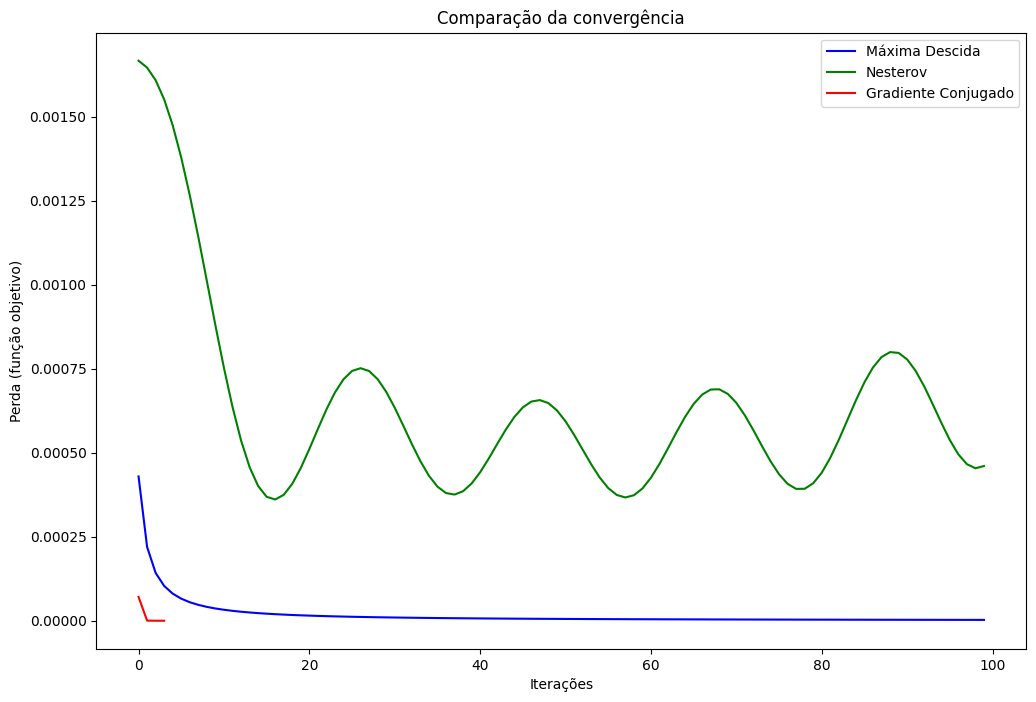

In [ ]:
# Plot the convergence comparison
plt.figure(figsize=(12, 8))

# Plot for each method
plt.plot(range(iter_md), loss_md, label="Máxima Descida", color="blue")
plt.plot(range(iter_nesterov), loss_nesterov, label="Nesterov", color="green")
plt.plot(range(iter_cg), loss_cg, label="Gradiente Conjugado", color="red")

plt.xlabel("Iterações")
plt.ylabel("Perda (função objetivo)")
plt.title("Comparação da convergência")
plt.legend()
plt.show()

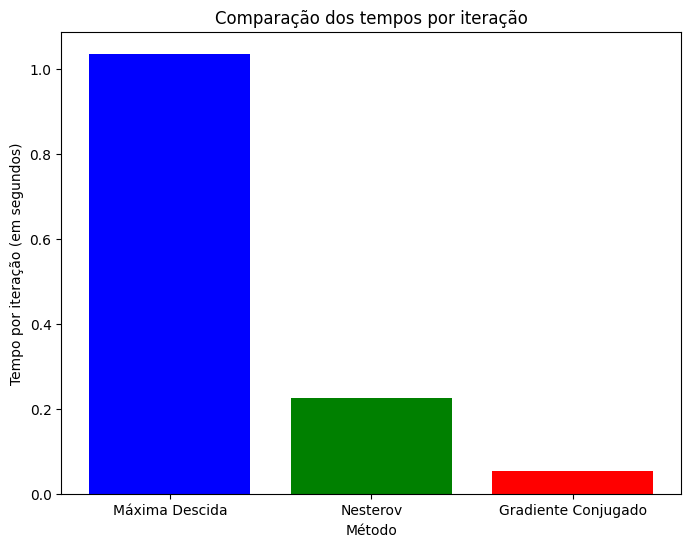

In [ ]:
# Time per iteration
time_per_iter_cg = time_cg / iter_cg if iter_cg > 0 else float('inf')
time_per_iter_nesterov = time_nesterov / iter_nesterov if iter_nesterov > 0 else float('inf')
time_per_iter_md = time_md / iter_md if iter_md > 0 else float('inf')

# Plot time vs. iterations
methods = ["Máxima Descida", "Nesterov", "Gradiente Conjugado"]
times = [time_per_iter_md, time_per_iter_nesterov, time_per_iter_cg]

plt.figure(figsize=(8, 6))
plt.bar(methods, times, color=["blue", "green", "red"])
plt.xlabel("Método")
plt.ylabel("Tempo por iteração (em segundos)")
plt.title("Comparação dos tempos por iteração")
plt.show()